In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [22]:
import numpy as np

In [15]:
with open('mshtml.txt', 'rb') as f:
    text = f.read()
lines = text.splitlines()

In [16]:
lines[:10]

[b'0x00000030',
 b'0x00000130',
 b'0x00000170',
 b'0x00000310',
 b'0x00000360',
 b'0x000003A0',
 b'0x000004D0',
 b'0x00000540',
 b'0x00000590',
 b'0x000005B0']

In [18]:
keys = [ int(line, base=16) for line in lines ]

In [19]:
len(keys)

37209

In [20]:
keys[:10]

[48, 304, 368, 784, 864, 928, 1232, 1344, 1424, 1456]

In [21]:
keys[-10:]

[18331304,
 18331320,
 18331376,
 18332384,
 21475480,
 21475488,
 21477776,
 21478768,
 21478920,
 21478984]

In [23]:
a1 = np.array(keys)

In [26]:
a2 = a1.copy()

In [27]:
a2.sort()

In [29]:
(a1 == a2).all()

True

In [31]:
a1.dtype = 'uint32'

In [33]:
a1.min(), a1.max()

(48, 21478984)

In [38]:
np.random.randint(5, 10, size=1, dtype='uint32')[0]

5

In [34]:
a1[:100]

array([  48,  304,  368,  784,  864,  928, 1232, 1344, 1424, 1456, 1680,
       1712, 1728, 1776, 1984, 2432, 2480, 2528, 2576, 2736, 3056, 3088,
       3152, 3216, 3280, 3312, 3440, 3552, 3760, 3808, 3888, 3936, 3984,
       4096, 4112, 4128, 4144, 4192, 4320, 4336, 4384, 4400, 4432, 4480,
       4528, 4544, 4576, 4592, 4608, 4640, 4672, 4704, 4736, 4752, 4768,
       4784, 4800, 4816, 4880, 4944, 4992, 5040, 5088, 5104, 5120, 5168,
       5200, 5248, 5264, 5344, 5360, 5392, 5408, 5456, 5504, 5552, 5600,
       5632, 5664, 5824, 5872, 6160, 6384, 6432, 6480, 6528, 6752, 6784,
       6928, 6976, 7024, 7072, 7200, 7216, 7248, 7264, 7376, 7456, 7616,
       7664], dtype=uint32)

In [51]:
def yield_new_values(array):
    last = None
    randint = np.random.randint
    for a in array:
        if not last:
            yield a
            last = a
            continue
        
        diff = a - last
        assert diff > 0, (diff, a, last)
        if diff <= 3:
            last = a
            yield a
            continue
            
        new = randint(last+1, a-1, size=1, dtype='uint32')[0]
        yield new
        yield a
        last = a
        

In [75]:
r1 = np.random.randint(0, 10, size=len(a1), dtype='uint8')

In [76]:
r1

array([6, 6, 3, ..., 8, 2, 4], dtype=uint8)

(array([ 3702.,  3712.,  3732.,  3760.,  3765.,  3673.,  3702.,  3811.,
         3686.,  3666.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

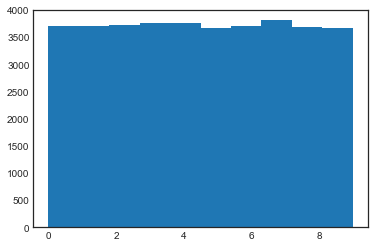

In [79]:
plt.hist(r1, bins=10)

In [80]:
r1[:200]

array([6, 6, 3, 1, 7, 8, 2, 8, 8, 4, 8, 2, 5, 2, 6, 5, 6, 1, 3, 8, 2, 9, 9,
       1, 8, 1, 1, 1, 7, 4, 8, 4, 8, 5, 3, 4, 0, 5, 4, 2, 9, 7, 3, 5, 6, 4,
       5, 4, 9, 4, 0, 6, 3, 2, 7, 7, 3, 3, 9, 2, 0, 9, 8, 5, 8, 2, 8, 2, 2,
       3, 0, 4, 5, 7, 1, 2, 3, 9, 0, 0, 8, 9, 4, 7, 5, 5, 6, 0, 0, 6, 9, 3,
       1, 5, 1, 6, 4, 8, 9, 2, 2, 9, 9, 0, 6, 1, 9, 7, 3, 2, 9, 9, 4, 1, 9,
       7, 2, 9, 3, 8, 5, 9, 4, 8, 6, 6, 9, 1, 8, 5, 4, 9, 5, 3, 8, 8, 0, 2,
       1, 5, 5, 6, 0, 9, 2, 7, 2, 8, 2, 1, 1, 5, 5, 8, 1, 5, 1, 7, 7, 8, 6,
       9, 4, 8, 5, 2, 2, 8, 4, 5, 6, 8, 7, 6, 2, 4, 8, 1, 8, 9, 7, 5, 4, 9,
       4, 5, 0, 2, 8, 6, 5, 3, 2, 6, 5, 5, 1, 6, 4, 1], dtype=uint8)

In [81]:
import pandas as pd

In [82]:
s1 = pd.Series(r1)

In [83]:
s1.describe()

count    37209.000000
mean         4.494934
std          2.865974
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
dtype: float64

In [178]:
(x, y) = np.unique(r1, return_counts=True)

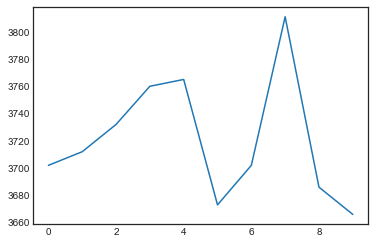

In [179]:
plt.plot(x, y)

In [180]:
(x, y)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([3702, 3712, 3732, 3760, 3765, 3673, 3702, 3811, 3686, 3666], dtype=int64))

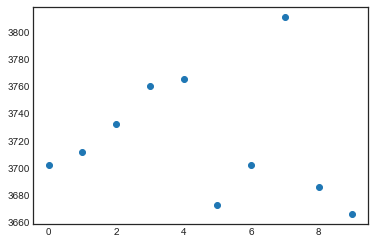

In [181]:
plt.scatter(x, y)

(array([ 3052.,   724.,  5224.,   190.,  2468.,  1182.,  1622.,  1865.,
         1680.,  2022.,  1781.,  2519.,  3434.,  1412.,   674.,   855.,
          657.,  2056.,  1765.,   706.,   873.,   436.,     0.,     0.,
            0.,     6.,     0.,     0.,     0.,     6.]),
 array([  4.80000000e+01,   7.16012533e+05,   1.43197707e+06,
          2.14794160e+06,   2.86390613e+06,   3.57987067e+06,
          4.29583520e+06,   5.01179973e+06,   5.72776427e+06,
          6.44372880e+06,   7.15969333e+06,   7.87565787e+06,
          8.59162240e+06,   9.30758693e+06,   1.00235515e+07,
          1.07395160e+07,   1.14554805e+07,   1.21714451e+07,
          1.28874096e+07,   1.36033741e+07,   1.43193387e+07,
          1.50353032e+07,   1.57512677e+07,   1.64672323e+07,
          1.71831968e+07,   1.78991613e+07,   1.86151259e+07,
          1.93310904e+07,   2.00470549e+07,   2.07630195e+07,
          2.14789840e+07]),
 <a list of 30 Patch objects>)

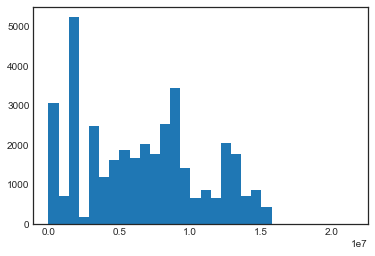

In [93]:
plt.hist(a1, bins=30)

In [94]:
a2 = a1 + r1

In [107]:
a2

array([      54,      310,      371, ..., 21478776, 21478922, 21478988], dtype=uint32)

In [95]:
len(a2)

37209

(array([ 3052.,   724.,  5224.,   190.,  2468.,  1182.,  1622.,  1865.,
         1680.,  2022.,  1781.,  2519.,  3434.,  1412.,   674.,   855.,
          657.,  2056.,  1765.,   706.,   873.,   436.,     0.,     0.,
            0.,     6.,     0.,     0.,     0.,     6.]),
 array([  5.40000000e+01,   7.16018467e+05,   1.43198293e+06,
          2.14794740e+06,   2.86391187e+06,   3.57987633e+06,
          4.29584080e+06,   5.01180527e+06,   5.72776973e+06,
          6.44373420e+06,   7.15969867e+06,   7.87566313e+06,
          8.59162760e+06,   9.30759207e+06,   1.00235565e+07,
          1.07395210e+07,   1.14554855e+07,   1.21714499e+07,
          1.28874144e+07,   1.36033789e+07,   1.43193433e+07,
          1.50353078e+07,   1.57512723e+07,   1.64672367e+07,
          1.71832012e+07,   1.78991657e+07,   1.86151301e+07,
          1.93310946e+07,   2.00470591e+07,   2.07630235e+07,
          2.14789880e+07]),
 <a list of 30 Patch objects>)

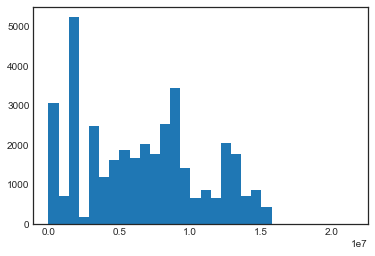

In [96]:
plt.hist(a2, bins=30)

In [97]:
s = [ int(str(i)[0]) for i in a2 ]

In [98]:
len(s)

37209

In [108]:
a2[:10]

array([  54,  310,  371,  785,  871,  936, 1234, 1352, 1432, 1460], dtype=uint32)

In [109]:
r1[:10]

array([6, 6, 3, 1, 7, 8, 2, 8, 8, 4], dtype=uint8)

In [99]:
s[:10]

[5, 3, 3, 7, 8, 9, 1, 1, 1, 1]

In [126]:
a1

array([      48,      304,      368, ..., 21478768, 21478920, 21478984], dtype=uint32)

In [127]:
zeroes = []
def blend_values(array, rand):
    for (a, r) in zip(array, rand):
        
        s = str(a)
        c = s[-1]
        if c == '0':
            zeroes.append(a)
            yield a
        else:
            yield int(''.join((s[:-1], str(r))))


In [136]:
def blend_values(array, rand):
    for (a, r) in zip(array, rand):      
        s = str(a)
        yield int(''.join((s[:-1], str(r))))

In [137]:
a2 = np.array([ i for i in blend_values(a1, r1) ])

In [152]:
a3 = a2.copy()

In [153]:
a3.sort()

In [155]:
(a2 == a3).all()

True

In [138]:
a2

array([      46,      306,      363, ..., 21478768, 21478922, 21478984])

In [139]:
s = [ int(str(i)[-1]) for i in a2 ]

In [140]:
sa = np.array(s, dtype='uint8')

In [141]:
sa

array([6, 6, 3, ..., 8, 2, 4], dtype=uint8)

(array([ 3702.,  3712.,  3732.,  3760.,  3765.,  3673.,  3702.,  3811.,
         3686.,  3666.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

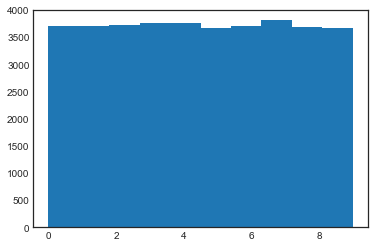

In [142]:
plt.hist(sa)

In [143]:
np.unique(sa, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([3702, 3712, 3732, 3760, 3765, 3673, 3702, 3811, 3686, 3666], dtype=int64))

In [144]:
str(a2[0]).zfill(10)

'0000000046'

In [147]:
l = [ str(i).zfill(10) for i in a2 ]

In [148]:
text2 = '\n'.join(l)

In [150]:
x = text2.encode('ascii')

In [151]:
x[:100]

b'0000000046\n0000000306\n0000000363\n0000000781\n0000000867\n0000000928\n0000001232\n0000001348\n0000001428\n0'

In [156]:
with open('mshtml-1.txt', 'wb') as f:
    f.write(text2.encode('ascii'))

In [157]:
a2.shape

(37209,)

In [158]:
def next_power_of_2(x):
    return 1<<(x-1).bit_length()

In [161]:
next_power_of_2(a2.shape[0])

65536

In [162]:
fp = np.memmap('mshtml.bin', dtype='uint32', mode='w+', shape=a2.shape)

In [163]:
fp[:] = a2[:]

In [164]:
fp

memmap([      46,      306,      363, ..., 21478768, 21478922, 21478984], dtype=uint32)

In [165]:
del fp

In [166]:
fp = np.memmap('mshtml.bin', dtype='uint32', mode='r')

In [167]:
fp

memmap([      46,      306,      363, ..., 21478768, 21478922, 21478984], dtype=uint32)

In [168]:
a2m = np.array(fp)

In [169]:
a2m

array([      46,      306,      363, ..., 21478768, 21478922, 21478984], dtype=uint32)

In [170]:
(a2 == a2m).all()

True

In [171]:
148836 / 4

37209.0